## Support Vector Machine (SVM)

**Support Vector Machine (SVM) is a machine learning algorithm that classifies data by finding a separating hyperplane. <br>SVMs are used for classification, regression, and outlier detection.**

**Support Vector Machine (SVM)**<br>

**How it works--->Uses a hyperplane to separate data into groups<br><br>
What it's good for--->Classifying and regressing data, including in high-dimensional spaces<br><br>
How it performs--->Maximizes the margin between data points of different classes<br><br>
What it's used for--->Classification, regression, anomaly detection, and more<br><br>
How it's effective--->Can handle complex data, and is resistant to overfitting**

In [2]:
from sklearn.datasets import make_blobs

In [14]:
# This generates a synthetic dataset with 50 samples, 2 clusters, and standard deviation of 0.60
# X contains the coordinates of the generated data points
# y contains the labels (cluster assignments) of each data point

# random_state=0: Ensures reproducibility of data (always the same points each run)
# cluster_std=0.60: Controls the spread or tightness of the blobs

X,y=make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

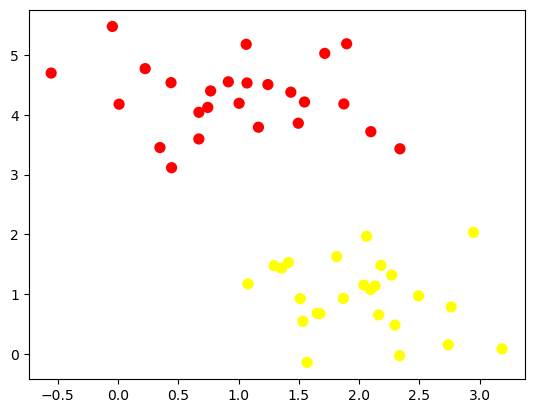

In [17]:
# Visualize the data points
# plt.scatter: Creates a scatter plot
# X[:,0] and X[:,1]: Extracts x and y coordinates of the data points
# c=y: Colors the points based on their cluster labels (y contains the cluster assignment for each point)
# c=y, It assigns colors to the plotted points based on their cluster labels (y). Points in the same cluster will share the same color.

# s=50: Sets the size of the plotted points
# cmap='autumn': Uses the 'autumn' color scheme (warm shades like orange and red for different clusters)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

### Building the model

In [22]:
# We will import the SVC class from scikit-learn's svm module

from sklearn.svm import SVC

# Then we will initialize the SVM model with specified parameters
# kernel='linear': Use a linear kernel to create a straight-line decision boundary
# C=1E10: Set the regularization parameter to a very large value to prioritize classification accuracy

model = SVC(kernel='linear', C=1E10)

# Then we train the model (fit it) on the dataset
# X: Input features (coordinates of data points)
# y: Labels (cluster assignments for each point)

model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

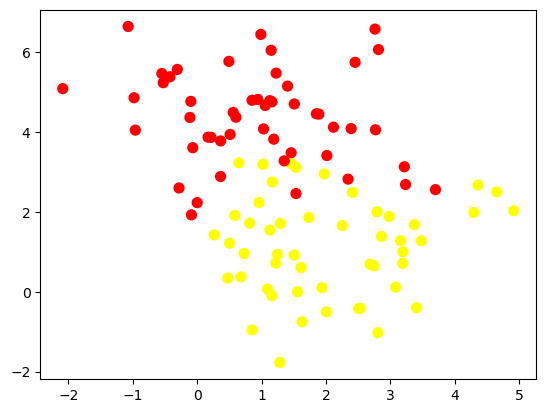

In [23]:
# First, we import the necessary libraries
from sklearn.datasets import make_circles, make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Now we generate concentric circles data
# We are creating 100 points, with an inner and outer circle
# Factor defines the size difference between the circles, and noise adds randomness to the points
X, y = make_circles(100, factor=0.1, noise=0.1)

# Next, we train a linear SVM on the circle data
# We specify a linear kernel to attempt separating the classes with a straight line
clf = SVC(kernel='linear').fit(X, y)

# Then we train an SVM using an RBF kernel
# The RBF kernel helps create a non-linear decision boundary to separate the circles better
# We set a large C value to prioritize classification accuracy, and gamma is set to 'auto'
clf = SVC(kernel='rbf', C=1E6, gamma='auto').fit(X, y)

# After that, we generate new data as blobs (clustered points)
# This time, we are creating 100 points distributed into 2 clusters
# The random state ensures reproducibility, and cluster_std determines how spread out the clusters are
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

# Finally, we plot the data points
# We use the x and y coordinates from the data, color them based on cluster labels, and use an autumn color map
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Display the plot
plt.show()


**Now, we will work on toy dataset, the previous synthetic data was to test the algorithm.<br>
Now, the real work begins on a dataset**

## Importing the dataset

In [26]:
from sklearn.datasets import load_breast_cancer
kanser=load_breast_cancer()

## Preprocessing the data

In [31]:
# Split the dataset into training and test sets
# X_train, y_train: Training data (used for model training)
# X_test, y_test: Test data (used to evaluate the model's performance)
# random_state=0 ensures the split is reproducible

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(kanser.data,kanser.target,random_state=0)

## Building the model

In [32]:
# Now we train the SVM model with the training data
# We're using the RBF kernel and setting gamma to 'auto' for automatic adjustment
svc = SVC(gamma='auto').fit(X_train, y_train)

# Next, we evaluate the model's accuracy on the training data
print(svc.score(X_train, y_train))

# Finally, we evaluate the model's accuracy on the test data
print(svc.score(X_test, y_test))


1.0
0.6293706293706294


In [33]:
# we calculate the minimum value for each feature in the training data
min_on_training = X_train.min(axis=0)

# Next, we calculate the range for each feature in the training data
range_on_training = (X_train - min_on_training).max(axis=0)

# Now, we scale the training data to normalize all features between 0 and 1
X_train_scaled = (X_train - min_on_training) / range_on_training

# We also scale the test data using the same minimum and range values from the training data
X_test_scaled = (X_test - min_on_training) / range_on_training

# Then, we train the SVM model on the scaled training data
svc = SVC(gamma='auto').fit(X_train_scaled, y_train)

# Finally, we evaluate the model's accuracy on the training data and the test data
print("Training accuracy:", svc.score(X_train_scaled, y_train))
print("Testing accuracy:", svc.score(X_test_scaled, y_test))


Training accuracy: 0.9483568075117371
Testing accuracy: 0.951048951048951


## Evaluating the model

In [34]:
# We create an SVM classifier with a regularization parameter (C) set to 1000
# Gamma is set to 'auto' to automatically adjust based on the number of features
svc = SVC(C=1000, gamma='auto').fit(X_train_scaled, y_train)

# Now, we calculate the accuracy of the model on the training data
print("Training accuracy:", svc.score(X_train_scaled, y_train))

# Next, we calculate the accuracy of the model on the test data
print("Testing accuracy:", svc.score(X_test_scaled, y_test))

Training accuracy: 0.9882629107981221
Testing accuracy: 0.972027972027972
